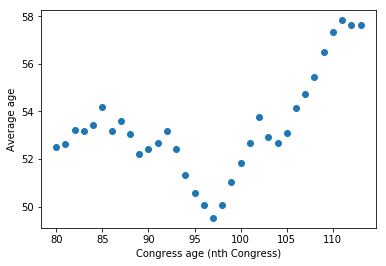

---------- 
 Under fitting


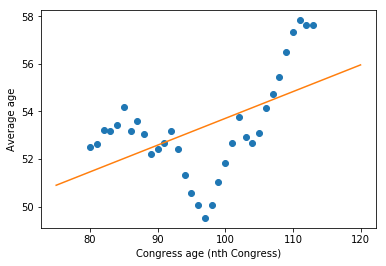

the average actual value for Congress 97 is : 49.5282
the average predicted value for Congress 97 is : 53.37050895339954
---------- 
  Appropriate fitting


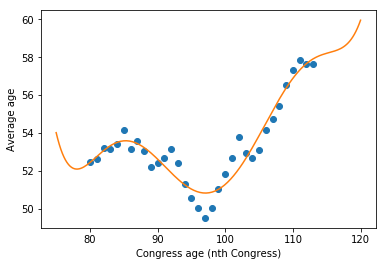

the average actual value for Congress 97 is : 49.5282
the average predicted value for Congress 97 is : 50.83842561673373
---------- 
  Appropriate fitting


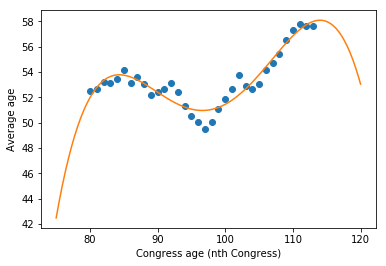

the average actual value for Congress 97 is : 49.5282
the average predicted value for Congress 97 is : 50.97198583763384
---------- 
  Appropriate fitting


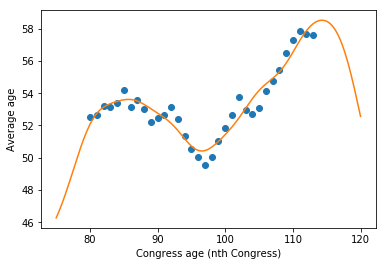

the average actual value for Congress 97 is : 49.5282
the average predicted value for Congress 97 is : 50.4474887996797
---------- 
  Over fitting


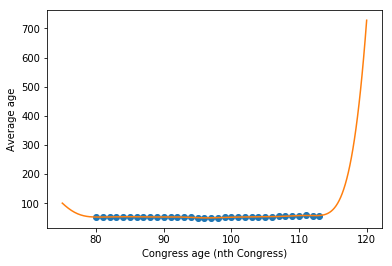

the average actual value for Congress 97 is : 49.5282
the average predicted value for Congress 97 is : 49.85548559417566
---------- 
  Over fitting


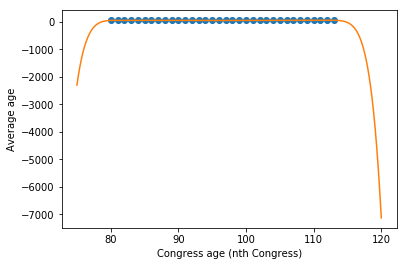

the average actual value for Congress 97 is : 49.5282
the average predicted value for Congress 97 is : 49.39009396545589


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def polynomialRegression(feature,target,degree):
    
    X=np.ones([feature.shape[0],degree+1])
    t97=np.ones(degree+1)
    for i in range(degree+1):
        X[:,i]=X[:,i]*(feature**i)
        t97[i]=t97[i]*(97**i)

        
    Y=target
    
    # Find the regression weights using the Moore-Penrose pseudoinverse.
    w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))  
    grid_times = np.linspace(75, 120, 200)
    grid_X=np.ones([grid_times.shape[0],degree+1])
    for i in range(degree+1):
        grid_X[:,i]=grid_X[:,i]*(grid_times**i)
    grid_Yhat  = np.dot(grid_X, w)

    #Plot the data and the regression line.
    plt.plot(feature, target, 'o', grid_times, grid_Yhat, '-')
    plt.xlabel("Congress age (nth Congress)")
    plt.ylabel("Average age")
    plt.show()
    print("the average actual value for Congress 97 is :",49.5282)
    print("the average predicted value for Congress 97 is :",np.dot(w.T,t97))


def sinRegression(feature,target,degree):
    
    X=np.ones([feature.shape[0],degree+1])
    t97=np.ones(degree+1)
    for i in range(degree):
        X[:,i+1]=X[:,i+1]* np.sin(feature/(i+1))
        t97[i+1]=t97[i+1]* np.sin(97/(i+1))

        
    Y=target
    
    # Find the regression weights using the Moore-Penrose pseudoinverse.
    w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))    
    
    grid_times = np.linspace(75, 120, 200)
    grid_X=np.ones([grid_times.shape[0],degree+1])
    
    for i in range(degree):
        grid_X[:,i+1]= grid_X[:,i+1]* np.sin(grid_times/(i+1))
    
    grid_Yhat  = np.dot(grid_X, w)
    

    #Plot the data and the regression line.
    plt.plot(feature, target, 'o', grid_times, grid_Yhat, '-')
    plt.xlabel("Congress age (nth Congress)")
    plt.ylabel("Average age")
    plt.show()
    print("the average actual value for Congress 97 is :",49.5282)
    print("the average predicted value for Congress 97 is :",np.dot(w.T,t97))






    
    
congress_ages=pd.read_csv("congress-ages.csv")
# Plot the data.
feature=congress_ages['congress']
target=congress_ages['average_age']
plt.plot(feature, target, 'o')
plt.xlabel("Congress age (nth Congress)")
plt.ylabel("Average age")
plt.show()


print('-'*10,"\n","Under fitting")
polynomialRegression(feature,target,1)


print('-'*10,"\n"," Appropriate fitting")
polynomialRegression(feature,target,6)

print('-'*10,"\n"," Appropriate fitting")
polynomialRegression(feature,target,4)

print('-'*10,"\n"," Appropriate fitting")
sinRegression(feature,target,6)

print('-'*10,"\n"," Over fitting")
sinRegression(feature,target,10)

print('-'*10,"\n"," Over fitting")
sinRegression(feature,target,22)

